##Project Name: EMIPredict AI - Intelligent Financial Risk Assessment Platform

**Project Type - Classification, Regression**

**Contribution - Individual**



##**Problem Statement-**

Build a comprehensive financial risk assessment platform that integrates machine learning models with MLflow experiment tracking to create an interactive web application for EMI prediction.
Nowadays, people struggle to pay EMI due to poor financial planning and inadequate risk assessment. This project aims to solve this critical issue by providing data-driven insights for better loan decisions.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    mean_absolute_error, mean_squared_error, r2_score
)
import joblib
import os



**Load dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')

/tmp/ipython-input-3276570232.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')


**Dataset First View**

In [ ]:
df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


**Dataset Rows & Columns count**

In [ ]:
df.shape

(404800, 27)

**Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

**Duplicate Values**

In [ ]:
df.duplicated().sum()

np.int64(0)

**What did you know about your dataset?**

##**2. Understanding Your Variables**

In [ ]:
df.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario',
       'requested_amount', 'requested_tenure', 'emi_eligibility',
       'max_monthly_emi'],
      dtype='object')

In [ ]:
df.describe(include='all')

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
count,404800.0,404800,404800,402396,404800,404800,404800.000000,404800,404800,402374.000000,...,404800,404800.000000,402380.000000,402374,402449.000000,404800,4.048000e+05,404800.000000,404800,404800.000000
unique,41.0,8,2,4,13662,3,NaN,5,3,NaN,...,2,NaN,NaN,12261,NaN,5,NaN,NaN,3,NaN
top,38.0,Male,Married,Graduate,18000.0,Private,NaN,Large Indian,Rented,NaN,...,No,NaN,NaN,115800.0,NaN,Home Appliances EMI,NaN,NaN,Not_Eligible,NaN
freq,91577.0,237427,307837,181015,4159,283099,NaN,121139,161601,NaN,...,243227,NaN,NaN,160,NaN,80988,NaN,NaN,312868,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5.364079,NaN,NaN,5828.446490,...,NaN,4543.407609,700.856223,NaN,96769.051731,NaN,3.708554e+05,29.126677,NaN,6763.602156
std,NaN,NaN,NaN,NaN,NaN,NaN,6.079135,NaN,NaN,8648.604639,...,NaN,7034.901139,88.435548,NaN,81373.053976,NaN,3.451945e+05,18.100854,NaN,7741.263317
min,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,0.000000,...,NaN,0.000000,0.000000,NaN,1400.000000,NaN,1.000000e+04,3.000000,NaN,500.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.200000,NaN,NaN,0.000000,...,NaN,0.000000,654.000000,NaN,38400.000000,NaN,1.240000e+05,15.000000,NaN,500.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.200000,NaN,NaN,0.000000,...,NaN,0.000000,701.000000,NaN,74000.000000,NaN,2.360000e+05,25.000000,NaN,4211.200000
75%,NaN,NaN,NaN,NaN,NaN,NaN,7.200000,NaN,NaN,10600.000000,...,NaN,8000.000000,748.000000,NaN,130600.000000,NaN,4.940000e+05,40.000000,NaN,9792.000000


### Check Unique Values for each variable.


In [ ]:
for i, col in enumerate(df.columns, start=0):
    print(f"Column {i}: {col}")
    print("Unique values:", df[col].unique())

Column 0: age
Unique values: [38.0 58.0 48.0 32.0 27.0 47.0 37.0 31.0 59.0 49.0 33.0 26.0 39.0 57.0
 28.0 '58' '38' '48' '32' '27' '37' '48.0' '33' '38.0' '49' '27.0' '31'
 '39' '47' '59' '32.0' '58.0' '57' '26' '28' '58.0.0' '39.0' '26.0' '37.0'
 '38.0.0' '32.0.0']
Column 1: gender
Unique values: ['Female' 'Male' 'female' 'male' 'M' 'MALE' 'F' 'FEMALE']
Column 2: marital_status
Unique values: ['Married' 'Single']
Column 3: education
Unique values: ['Professional' 'Graduate' 'High School' 'Post Graduate' nan]
Column 4: monthly_salary
Unique values: ['82600.0' '21500.0' '86100.0' ... '56779.0' '56280.0' '55905.0']
Column 5: employment_type
Unique values: ['Private' 'Government' 'Self-employed']
Column 6: years_of_employment
Unique values: [ 0.9  7.   5.8  2.2  3.4  5.  36.  12.9  1.9  7.5  3.7  1.3  3.2  0.5
 26.   0.8  4.2  2.6  3.9  9.7  4.7  9.6  1.7  9.4  4.1  1.   7.6 16.
  2.5  1.6 17.1  6.6 12.6  2.3  4.5 11.3 10.   0.7  3.   2.1  2.7  0.6
  8.6  5.9  8.4 12.4  2.8 15.9 10.2  1.2

# **Converting datatypes**

**column 'age', 'monthly salary','bank balance' are actually in integer format given in the object datatype so we have to convert it into integer datatype**

In [ ]:
cols=['age','monthly_salary','bank_balance']

In [ ]:
for col in cols:
    # Convert to string
    df[col] = df[col].astype(str)

    # Remove all characters except digits and dot
    df[col] = df[col].str.replace(r'[^0-9.]', '', regex=True)

    # Keep only the first dot, remove extra ones
    df[col] = df[col].apply(lambda x: x if x.count('.') <= 1 else x.replace('.', '', x.count('.') - 1))

    # Replace empty strings with NaN
    df[col] = df[col].replace('', np.nan)

    # Convert to float first (NaN is supported in float)
    df[col] = df[col].astype(float)

    # Then fill NaN with 0 and convert to int
    df[col] = df[col].fillna(0).astype(int)

print(df.dtypes)
display(df.head())

age                         int64
gender                     object
marital_status             object
education                  object
monthly_salary              int64
employment_type            object
years_of_employment       float64
company_type               object
house_type                 object
monthly_rent              float64
family_size                 int64
dependents                  int64
school_fees               float64
college_fees              float64
travel_expenses           float64
groceries_utilities       float64
other_monthly_expenses    float64
existing_loans             object
current_emi_amount        float64
credit_score              float64
bank_balance                int64
emergency_fund            float64
emi_scenario               object
requested_amount          float64
requested_tenure            int64
emi_eligibility            object
max_monthly_emi           float64
dtype: object


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38,Female,Married,Professional,82600,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38,Female,Married,Graduate,21500,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38,Male,Married,Professional,86100,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58,Female,Married,High School,66800,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48,Female,Married,Professional,57300,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


In [ ]:
# Check for missing values
null_per_column=df.isnull().sum()
null_per_column

,0
age,0
gender,0
marital_status,0
education,2404
monthly_salary,0
employment_type,0
years_of_employment,0
company_type,0
house_type,0
monthly_rent,2426


**Plot null values using Heatmap**

**Chart 1**

we use here to_frame()because we calculate null values as series and heatmap wants value in the 2d format so we convert seris into the 2d format. So, .to_frame() converts the 1D Series → 2D DataFrame,

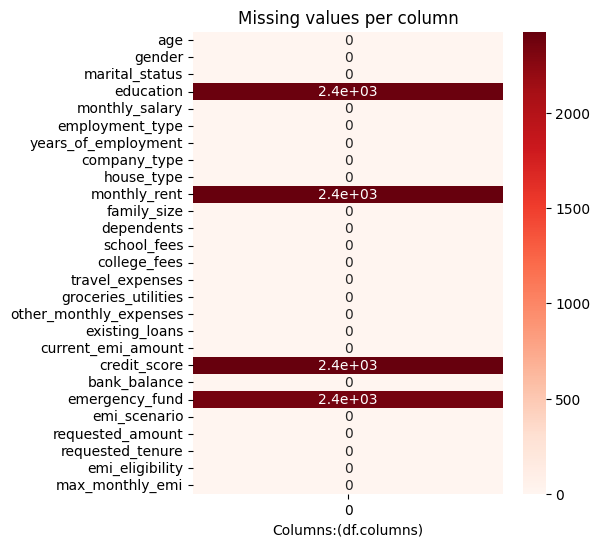

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt # Import matplotlib

plt.figure(figsize=(5,6))
sns.heatmap(null_per_column.to_frame(),cmap='Reds',annot=True)
plt.title('Missing values per column')
plt.xlabel('Columns:(df.columns)')
plt.show()

**Missing values percentage**

In [ ]:
total=len(df)
total

404800

In [ ]:
percent_null=(df.isnull().sum()/total)*100
percent_null

,0
age,0.000000
gender,0.000000
marital_status,0.000000
education,0.593874
monthly_salary,0.000000
employment_type,0.000000
years_of_employment,0.000000
company_type,0.000000
house_type,0.000000
monthly_rent,0.599308


**Using Bar Plot-percent of missing value**

**Chart 2**

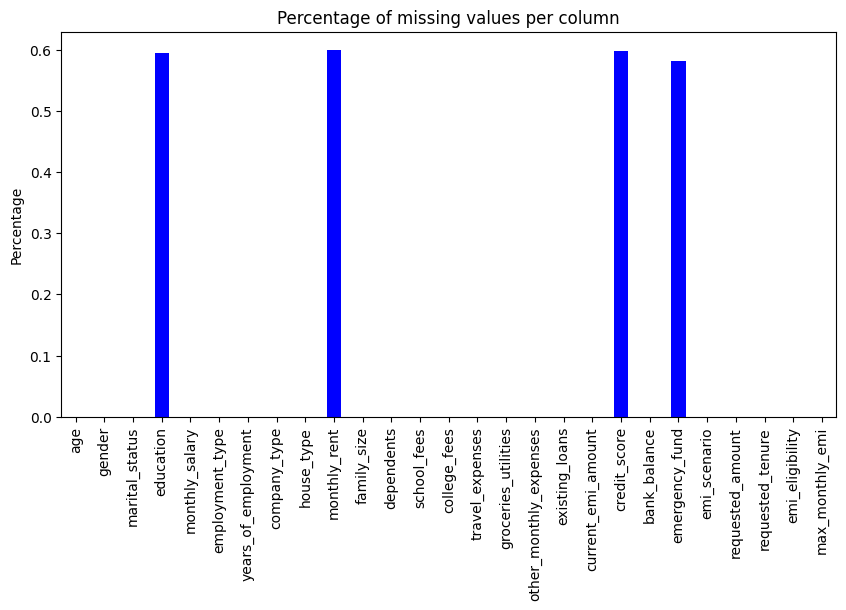

In [ ]:
plt.figure(figsize=(10,5))
percent_null.plot(kind='bar',color='Blue')
plt.title('Percentage of missing values per column')
plt.ylabel('Percentage')
plt.show()

null values are neglisible so instead droping them I prefer to fill them

In [ ]:
df['education'] = df['education'].fillna('No School')


In [ ]:
df['monthly_rent'] = df['monthly_rent'].fillna(0)


In [ ]:
# Convert 'credit_score' to numeric, coercing errors to NaN
df['credit_score'] = pd.to_numeric(df['credit_score'], errors='coerce')
# Then fill NaN with the median
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].median())

In [ ]:
df['emergency_fund'] = df['emergency_fund'].fillna(0)


In [ ]:
df.isnull().sum()

,0
age,0
gender,0
marital_status,0
education,0
monthly_salary,0
employment_type,0
years_of_employment,0
company_type,0
house_type,0
monthly_rent,0


Checking skewness of every column

In [ ]:
df.skew(numeric_only=True)

,0
age,1.300215
monthly_salary,18.106949
years_of_employment,2.147970
monthly_rent,1.620951
family_size,0.022211
dependents,0.022211
school_fees,0.584345
college_fees,1.539982
travel_expenses,1.355937
groceries_utilities,1.228968


**Why handle skewness?**

Skewness means data is not symmetric — it has a long tail.

Many machine learning models (like Linear Regression, ANN, etc.) perform better if numeric features are normally distributed or less skewed.

So, you apply a log transformation to reduce skewness.

In [ ]:
import numpy as np

# Columns that are highly skewed
cols_skewed = [
    'monthly_salary', 'years_of_employment', 'monthly_rent',
    'travel_expenses', 'groceries_utilities', 'other_monthly_expenses',
    'current_emi_amount', 'bank_balance', 'emergency_fund',
    'requested_amount', 'max_monthly_emi'
]

# Apply log1p to reduce skewness
for col in cols_skewed:
    df[col] = np.log1p(df[col])


In [ ]:
# Check skewness again after transformation
before_skew = df[cols_skewed].skew()
after_skew = df[cols_skewed].skew()


Chart 3

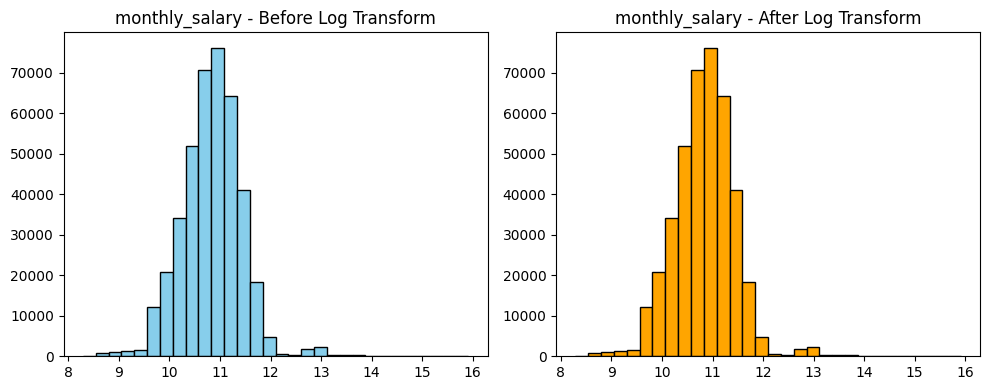

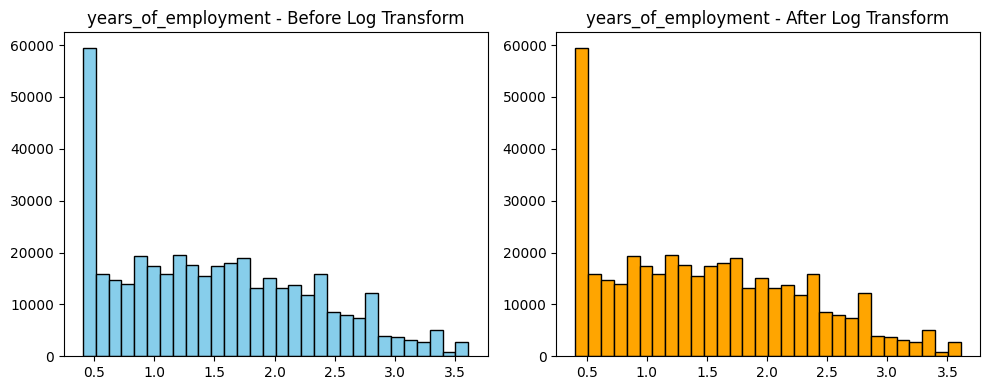

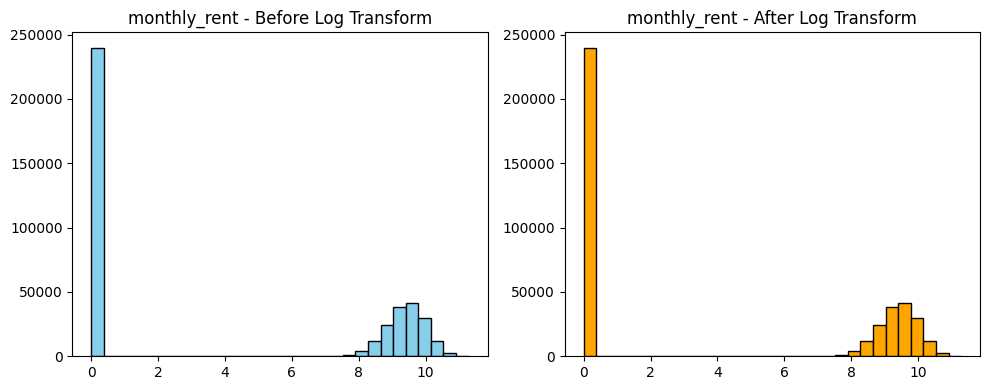

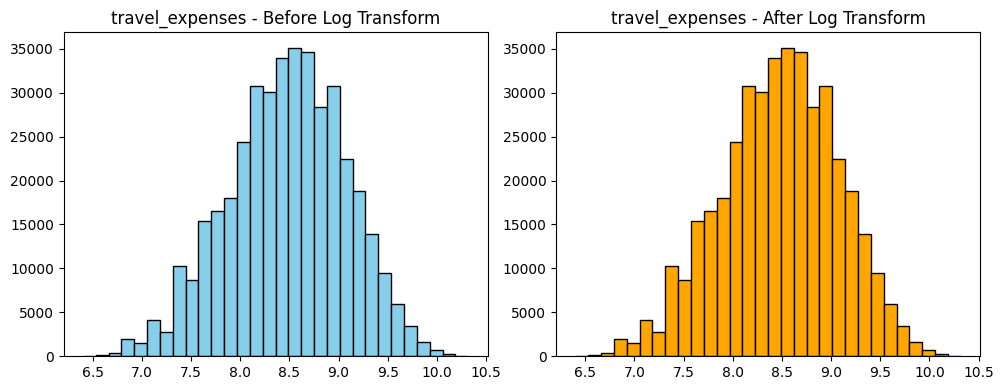

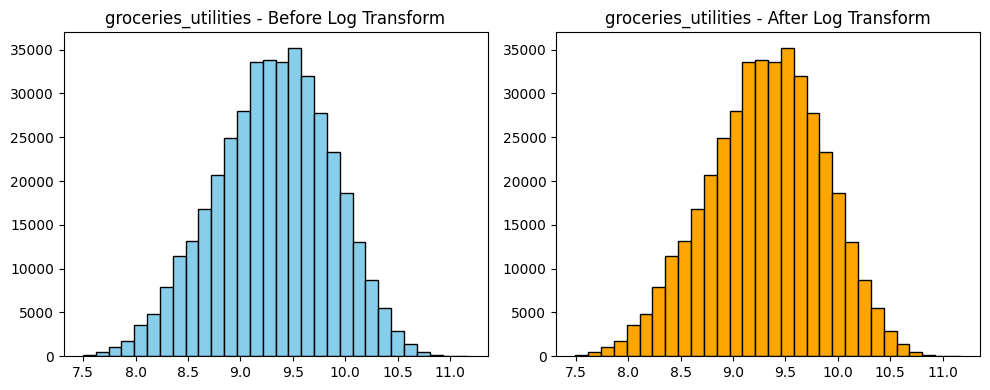

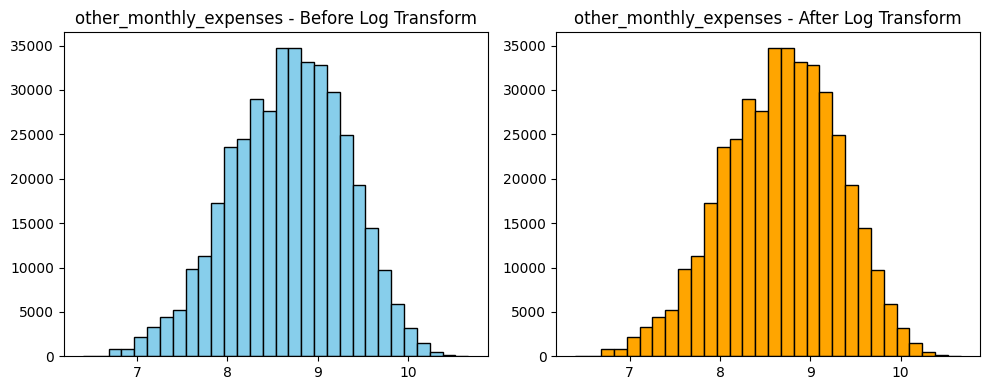

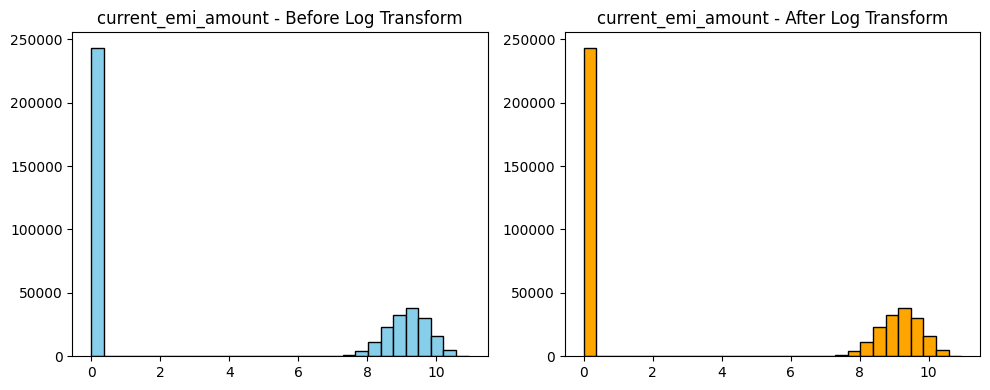

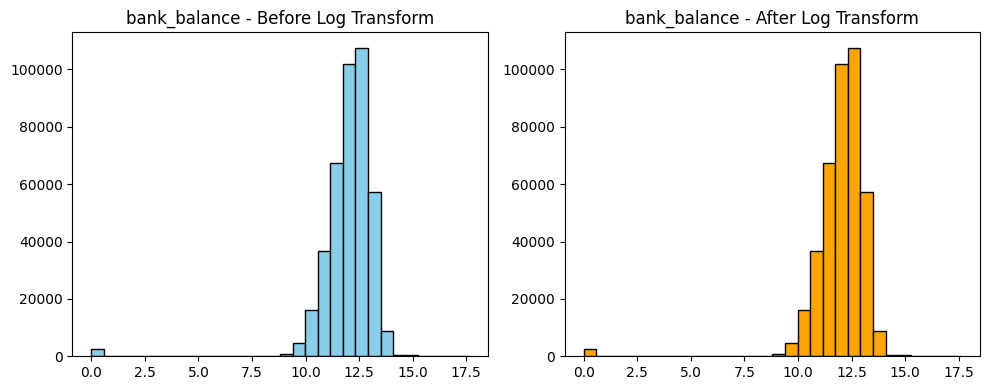

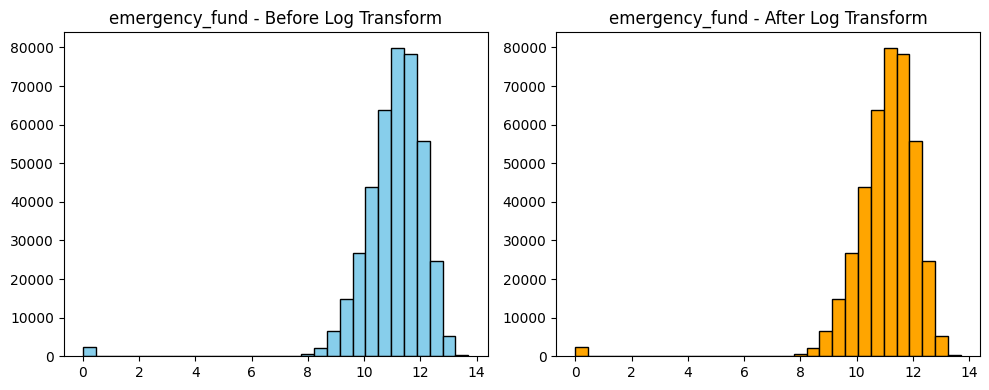

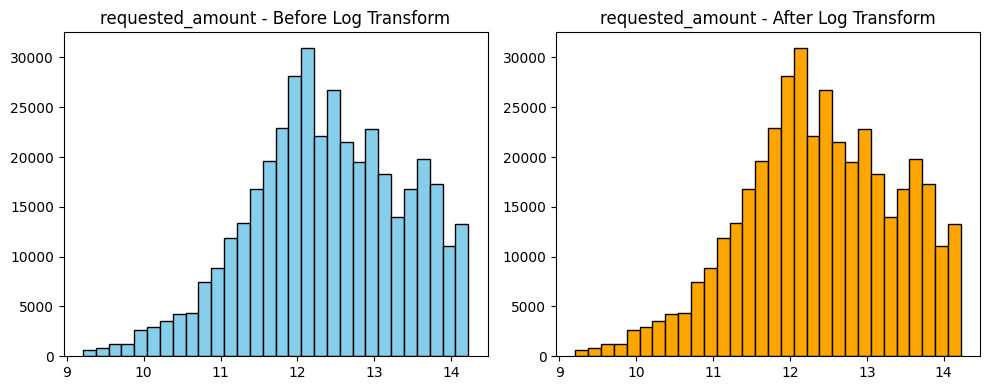

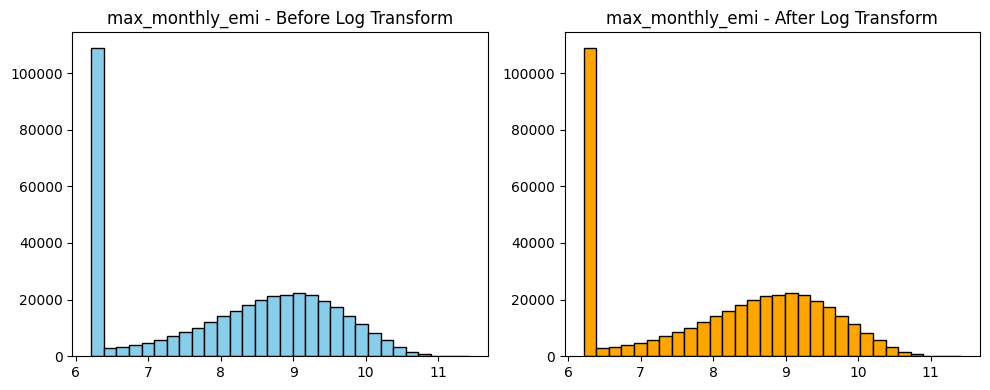

In [ ]:
# Create histograms before and after transformation
for col in cols_skewed:
    plt.figure(figsize=(10,4))

    # Before transformation
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{col} - Before Log Transform')

    # After transformation
    plt.subplot(1, 2, 2)
    plt.hist(df[col], bins=30, color='orange', edgecolor='black')
    plt.title(f'{col} - After Log Transform')

    plt.tight_layout()
    plt.show()

**Let’s understand why the “before” and “after” graphs look almost the same even though the skewness values changed.**

**Reason**: Axis scaling in histograms

By default, histograms auto-scale both the x-axis (values) and y-axis (frequency).

After log transform, the range becomes much smaller (for example, ₹100000 → log(100000)=11.5).
So, bars shift — but the graph rescales to fill space.

This can make both “before” and “after” histograms look similar even though values have changed a lot.

**Outliers**

**Why checking outliers after log transformation?**

Log (or any transformation like √ or Box-Cox) is meant to reduce extreme outliers and normalize your data.

So, after transformation, you should re-check if the outliers have reduced or disappeared.

This helps decide whether you still need to remove or cap (winsorize) them.

**Chart 4**

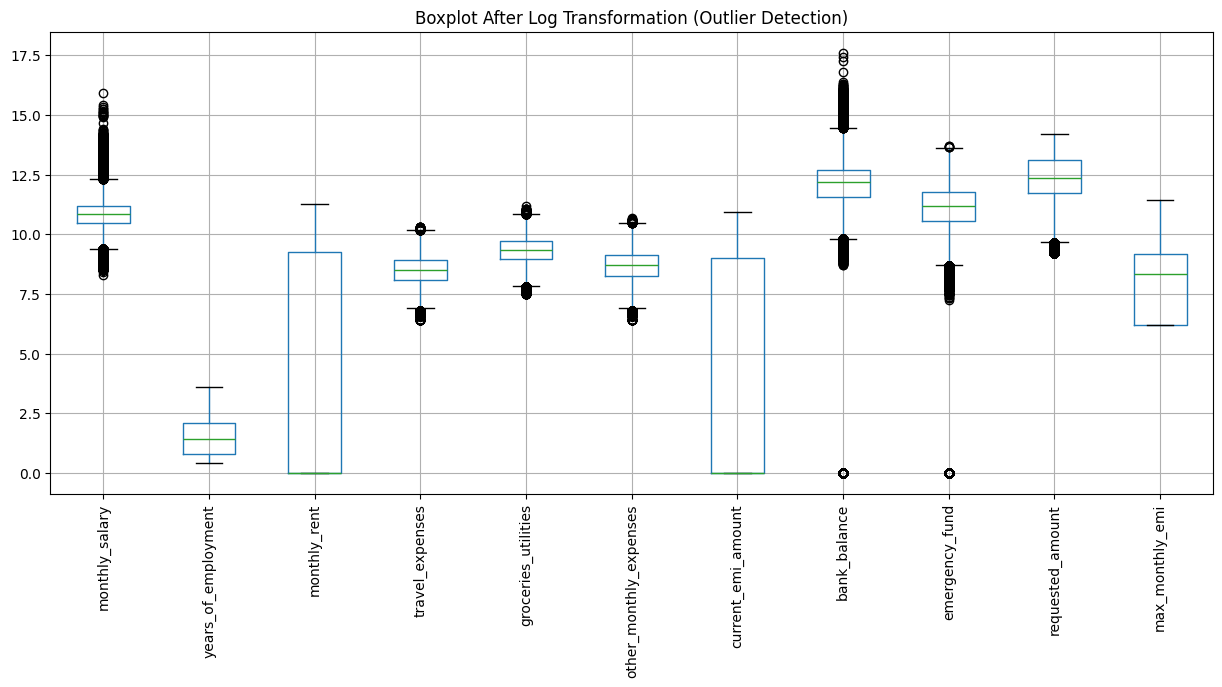

In [ ]:
cols_after_log = [
    'monthly_salary', 'years_of_employment', 'monthly_rent',
    'travel_expenses', 'groceries_utilities', 'other_monthly_expenses',
    'current_emi_amount', 'bank_balance', 'emergency_fund',
    'requested_amount', 'max_monthly_emi'
]

# Plot boxplots after log transformation
plt.figure(figsize=(15, 6))
df[cols_after_log].boxplot()
plt.title("Boxplot After Log Transformation (Outlier Detection)")
plt.xticks(rotation=90)
plt.show()

 Skewness reduced — most boxes look more balanced and compact.

 Still, some columns have remaining outliers:

*monthly_salary, bank_balance, and emergency_fund show many outlier points.*

Columns like travel_expenses, groceries_utilities, and requested_amount look much better.

years_of_employment, monthly_rent, and current_emi_amount still have a few extreme values.

**Capping Outliers Using IQR**

In [ ]:

# Loop through each column and cap outliers
for col in cols_after_log:
    Q1 = df[col].quantile(0.25)   # 25th percentile
    Q3 = df[col].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                 # Interquartile Range

    lower_limit = Q1 - 1.5 * IQR  # Lower bound
    upper_limit = Q3 + 1.5 * IQR  # Upper bound

    # Cap the outliers (replace values outside range)
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

print("✅ Outliers capped successfully!")


✅ Outliers capped successfully!


**Chart 5**

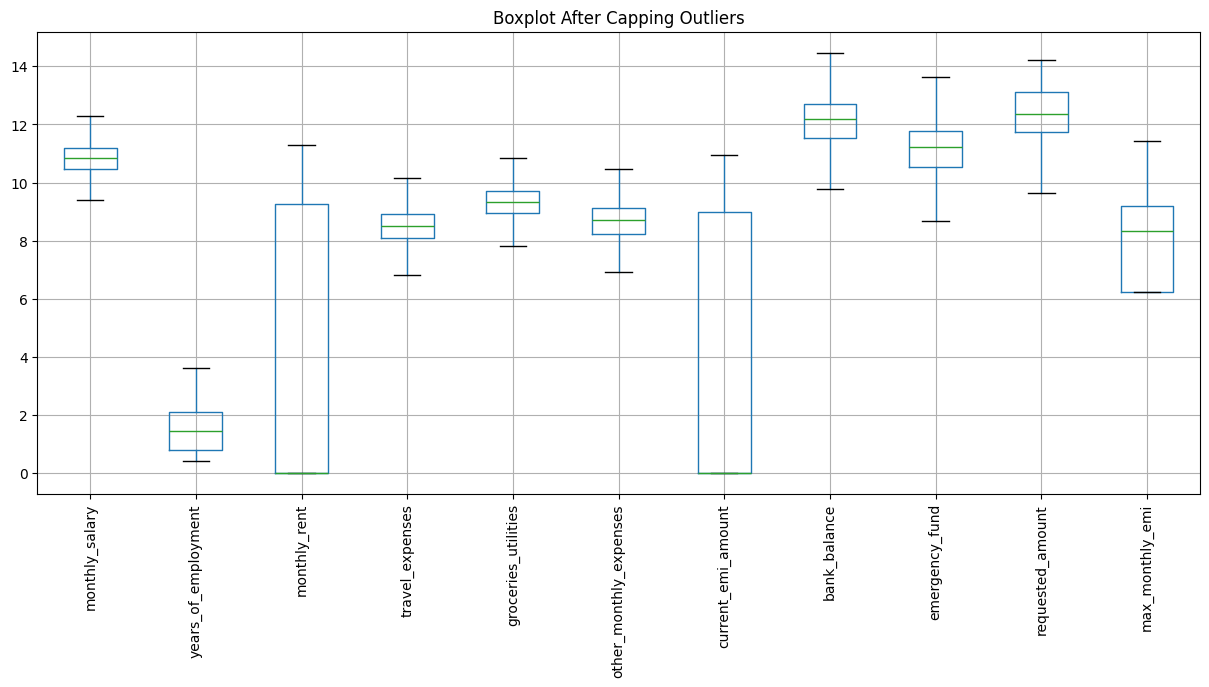

In [ ]:
plt.figure(figsize=(15,6))
df[cols_after_log].boxplot()
plt.title("Boxplot After Capping Outliers")
plt.xticks(rotation=90)
plt.show()

**Label Encoding (binary or ordinal)**

In [ ]:
label_cols = ['gender', 'marital_status', 'existing_loans','emi_eligibility']
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

**One-Hot Encoding**

In [ ]:
onehot_cols = ['employment_type', 'company_type', 'house_type', 'emi_scenario','education']

df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

In [ ]:
# Move target column to last
df = df[[col for col in df.columns if col != 'emi_eligibility'] + ['emi_eligibility']]


In [ ]:
df.head(3)

,age,gender,marital_status,monthly_salary,years_of_employment,monthly_rent,family_size,dependents,school_fees,college_fees,...,house_type_Rented,emi_scenario_Education EMI,emi_scenario_Home Appliances EMI,emi_scenario_Personal Loan EMI,emi_scenario_Vehicle EMI,education_High School,education_No School,education_Post Graduate,education_Professional,emi_eligibility
0,38,2,0,11.321777,0.641854,9.903538,3,2,0.0,0.0,...,True,False,False,True,False,False,False,False,True,2
1,38,2,0,9.975855,2.079442,0.000000,2,1,5100.0,0.0,...,False,False,False,False,False,False,False,False,False,2
2,38,5,0,11.363276,1.916923,0.000000,4,3,0.0,0.0,...,False,True,False,False,False,False,False,False,True,0


**Chart 6**
Age Distribution

Text(0, 0.5, 'Frequency')

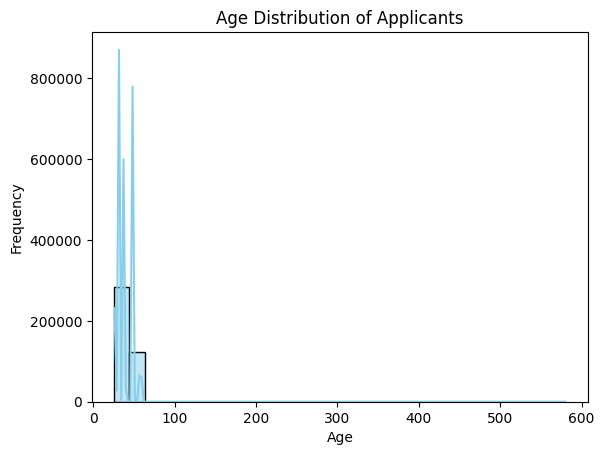

In [ ]:
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Applicants')
plt.xlabel('Age')
plt.ylabel('Frequency')


**Why Chosen:**
Shows age spread of loan applicants — useful for understanding which age group applies most.

**Insights:**
Most applicants might fall between 25–40 years, indicating a working population applying for EMIs.

**Business Impact:**
Helps design targeted EMI products (e.g., lower-interest loans for young professionals).

**Chart 7**
 Monthly Salary Distribution

Text(0, 0.5, 'Applicants Count')

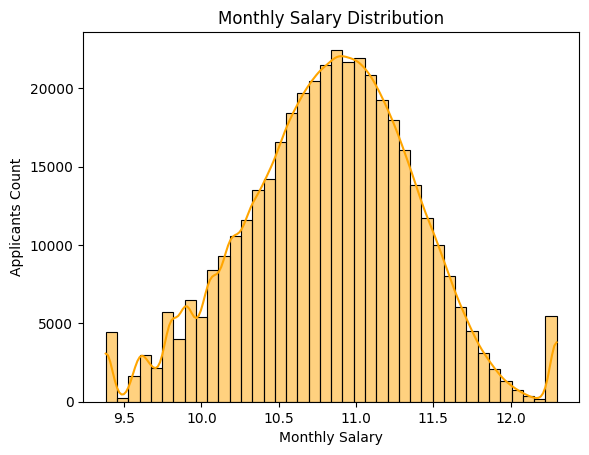

In [ ]:
sns.histplot(df['monthly_salary'], bins=40, kde=True, color='orange')
plt.title('Monthly Salary Distribution')
plt.xlabel('Monthly Salary')
plt.ylabel('Applicants Count')


**Why Chosen:**
To analyze the income range of loan seekers.

**Insights:**
Can identify which income group dominates — e.g., middle-income earners.

**Business Impact:**
Helps adjust EMI eligibility criteria and tailor financial products for key segments.

**Chart 8**
Employment Type Count

/tmp/ipython-input-866959993.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')
/tmp/ipython-input-866959993.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='employment_type', data=df_original, palette='cool')


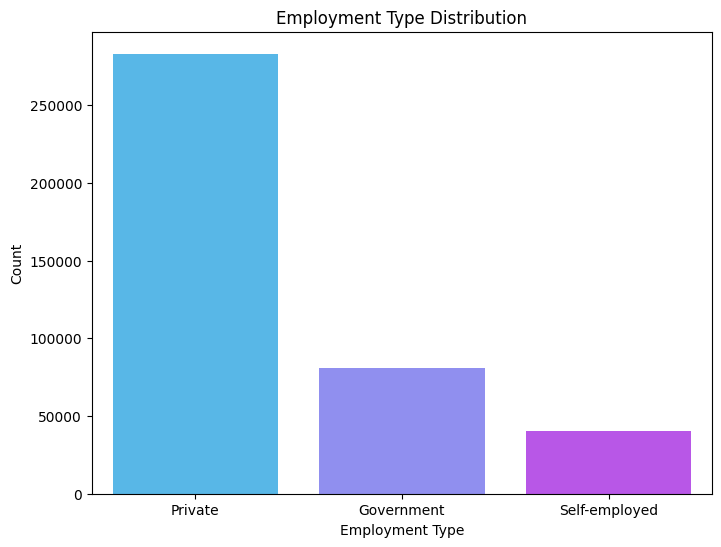

In [ ]:
# Load the dataset again for plotting the original 'employment_type' distribution
df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')

plt.figure(figsize=(8, 6))
sns.countplot(x='employment_type', data=df_original, palette='cool')
plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

**Why Chosen:**
Shows which job types are more likely to apply (private, government, self-employed).

**Insights**:
If private-sector dominates, they’re main EMI applicants.

**Business Impact:**
Helps refine risk scoring — self-employed might have more variable income → higher risk

**Chart 9**
Education Level vs. Credit Score

/tmp/ipython-input-41250264.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')
/tmp/ipython-input-41250264.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='education', y='credit_score', data=df_original, palette='viridis')


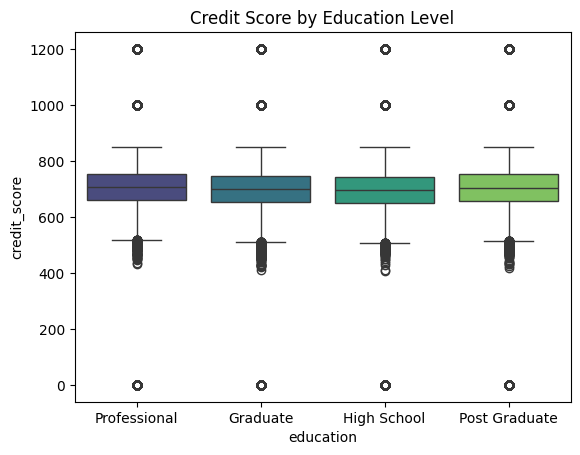

In [ ]:
# Load the dataset again for plotting the original 'education' distribution
df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')

sns.boxplot(x='education', y='credit_score', data=df_original, palette='viridis')
plt.title('Credit Score by Education Level')
plt.show()

**Why Chosen:**
Shows how education correlates with financial discipline (credit score).

**Insights:**
Higher education may correlate with better credit behavior.

**Business Impact:**
Helps credit officers factor education into EMI risk modeling.

**Chart 10**
House Type vs. Bank Balance

/tmp/ipython-input-4182510305.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')
/tmp/ipython-input-4182510305.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='house_type', y='bank_balance', data=df_original, palette='Set2')


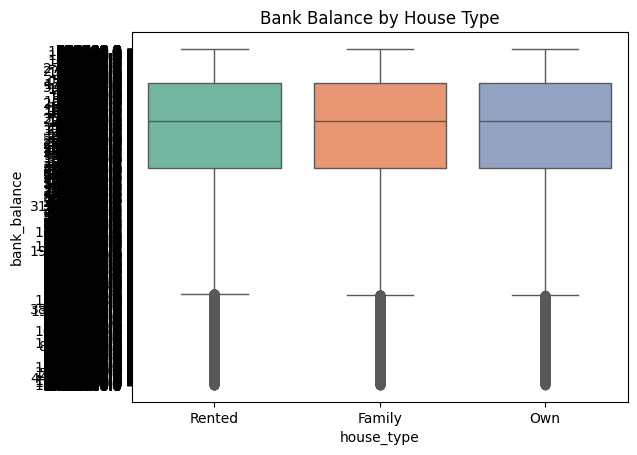

In [ ]:
# Load the dataset again for plotting the original 'house_type' distribution
df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')

sns.boxplot(x='house_type', y='bank_balance', data=df_original, palette='Set2')
plt.title('Bank Balance by House Type')
plt.show()

**Why Chosen:**
Examines wealth differences based on living conditions.

**Insights:**
Homeowners may maintain higher bank balances.

**Business Impact**:
Helps identify financial stability indicators for EMI approval scoring.

**Chart 11**
Monthly Rent vs. Salary

/tmp/ipython-input-669180453.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


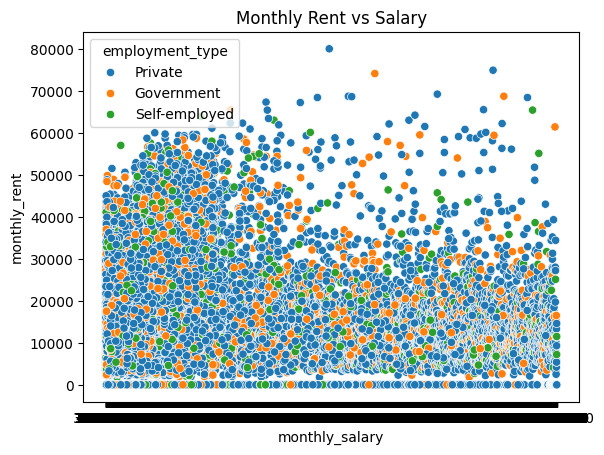

In [ ]:
# Load the dataset again for plotting with original 'employment_type'
df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')

sns.scatterplot(x='monthly_salary', y='monthly_rent', data=df_original, hue='employment_type')
plt.title('Monthly Rent vs Salary')
plt.show()

**Why Chosen:**
Compares how rent burdens differ across income groups.

**Insights:**
High rent-to-salary ratio indicates potential EMI stress.

**Business Impact:**
Used in risk evaluation — high rent → lower EMI repayment capacity.

**Chart 12**
Dependents vs. Monthly Expenses

/tmp/ipython-input-787742313.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dependents', y='other_monthly_expenses', data=df, palette='mako')


Text(0.5, 1.0, 'Dependents vs Monthly Expenses')

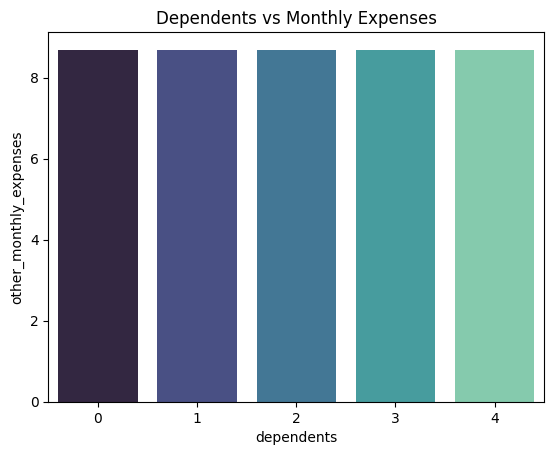

In [ ]:
sns.barplot(x='dependents', y='other_monthly_expenses', data=df, palette='mako')
plt.title('Dependents vs Monthly Expenses')


**Why Chosen**:
Shows effect of family size on expenses.

**Insights**:
More dependents = higher monthly obligations.

**Business Impact**:
Used to assess financial burden before approving EMIs.

**Chart 13**
Bank Balance vs. Emergency Fund

/tmp/ipython-input-2717590535.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')


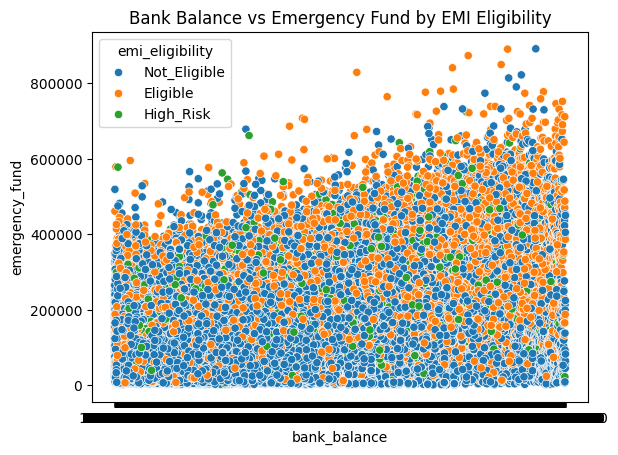

In [ ]:
# Load the dataset again for plotting with original 'emi_eligibility'
df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')

sns.scatterplot(x='bank_balance', y='emergency_fund', data=df_original, hue='emi_eligibility')
plt.title('Bank Balance vs Emergency Fund by EMI Eligibility')
plt.show()

**Why Chosen:**
Shows financial stability indicators between groups.

**Insights:**
Applicants with higher balances usually have sufficient emergency funds.

**Business Impact**:
Helps predict default risk — financially stable customers are safer.

**Chart 13**

**Family Size vs. EMI Eligibility**

/tmp/ipython-input-1382911425.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')
/tmp/ipython-input-1382911425.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emi_eligibility', y='family_size', data=df_original, palette='coolwarm')


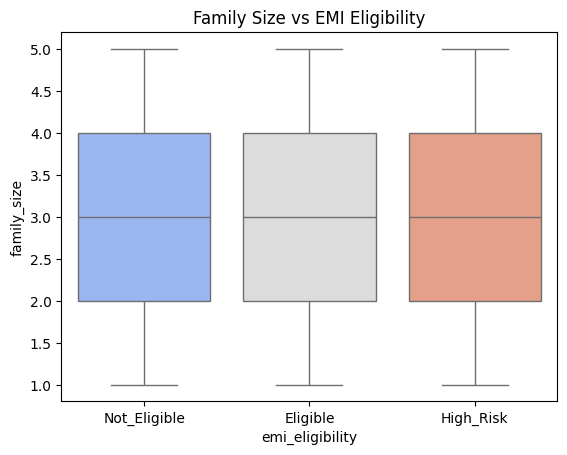

In [ ]:
# Load the dataset again for plotting with original 'emi_eligibility'
df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')

sns.boxplot(x='emi_eligibility', y='family_size', data=df_original, palette='coolwarm')
plt.title('Family Size vs EMI Eligibility')
plt.show()

**Chart 14**

**Requested Amount vs. Current EMI**

/tmp/ipython-input-1166683938.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


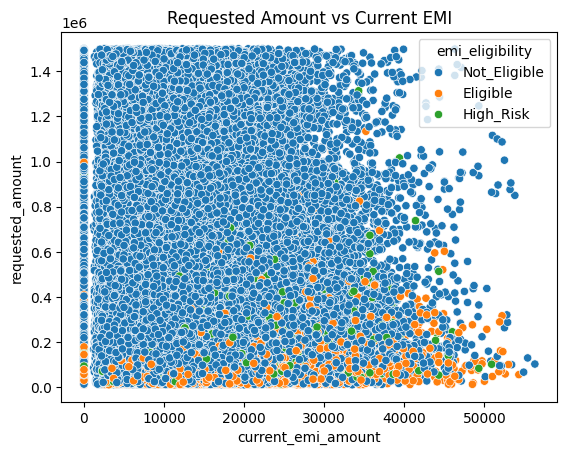

In [ ]:
# Load the dataset again for plotting with original 'emi_eligibility'
df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')

sns.scatterplot(x='current_emi_amount', y='requested_amount', data=df_original, hue='emi_eligibility')
plt.title('Requested Amount vs Current EMI')
plt.show()

**Why Chosen:**
Checks if people already with high EMIs request more loans.

**Insights:**
High current EMI + high request → over-leveraged applicants.

**Business Impact**:
Supports loan rejection or adjustment decisions to reduce risk.

**Chart 15**

**Pair plot**

/tmp/ipython-input-851718050.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')


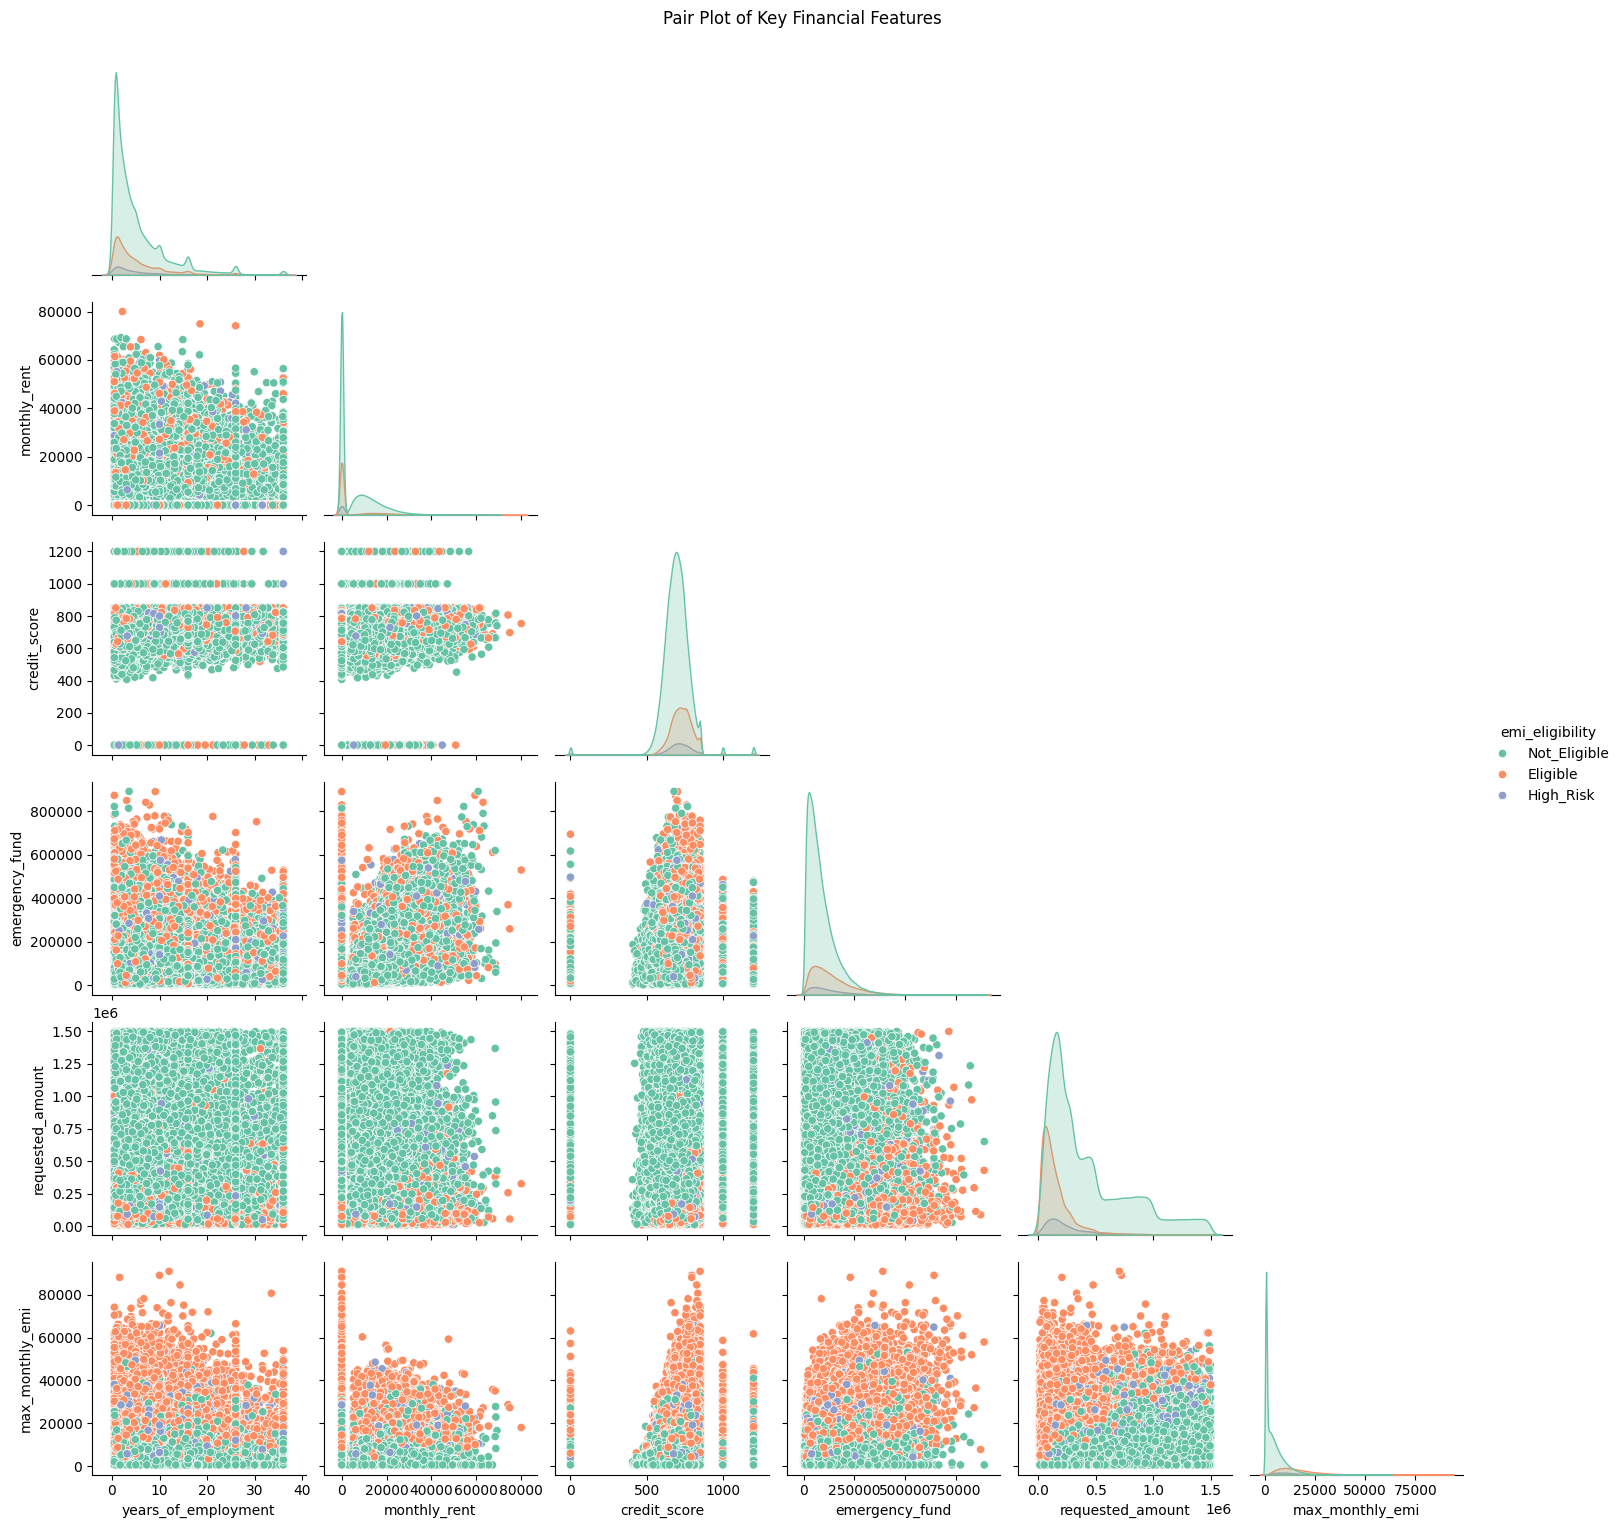

In [ ]:
# Load the dataset again for the pairplot with original 'emi_eligibility'
df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')

num_cols = [
    'age', 'monthly_salary', 'years_of_employment',
    'monthly_rent', 'credit_score', 'bank_balance',
    'emergency_fund', 'requested_amount', 'max_monthly_emi'
]

# Pairplot with EMI Eligibility hue
sns.pairplot(df_original[num_cols + ['emi_eligibility']], hue='emi_eligibility', diag_kind='kde', corner=True, palette='Set2')

plt.suptitle('Pair Plot of Key Financial Features', y=1.02)
plt.show()

**Hypothesis Testing**

Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothesis Test 1: Does Gender Affect EMI Eligibility?**

Hypotheses

Null (H₀): Gender has no effect on EMI eligibility.

Alternative (H₁): EMI eligibility depends on gender

**Test Used: Chi-Square Test (for categorical variables)**

In [ ]:
from scipy.stats import chi2_contingency

# Load the dataset again for the chi-square test
df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')

# Create contingency table
contingency = pd.crosstab(df_original['gender'], df_original['emi_eligibility'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square value:", chi2)
print("p-value:", p)

/tmp/ipython-input-71875787.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')


Chi-square value: 10.902533932808588
p-value: 0.6936752450216617


**Interpretation**

If p < 0.05, reject H₀ → gender significantly affects EMI eligibility.

If p ≥ 0.05, fail to reject H₀ → gender does not influence EMI eligibility.

p-value: 0.6936752450216617 hence fail to reject Ho

**Business Impact**

If gender shows no significant difference, banks can ensure their EMI approval policies are gender-neutral and comply with fair lending practices.

**Hypothesis** **Test 2:**

**Do males and females have different average monthly salaries?**

**Hypotheses**

**Null (H₀)**: There is no difference in mean monthly salary between males and females.

**Alternative (H₁)**: There is a significant difference in mean monthly salary between males and females.

**Test Used: Independent t-test**

In [ ]:
print(df['gender'].unique())
print(df['monthly_salary'].isna().sum())
print(df['monthly_salary'].dtype)


[2 5 6 7 3 4 0 1]
0
float64


In [ ]:
male_salary = df[df['gender'] == 1]['monthly_salary']
female_salary = df[df['gender'] == 0]['monthly_salary']

from scipy.stats import ttest_ind
t_stat, p = ttest_ind(male_salary, female_salary, nan_policy='omit')

print("T-statistic:", t_stat)
print("p-value:", p)



T-statistic: -0.1563868881033092
p-value: 0.8757416084388168


**Interpretation**

 p ≥ 0.05, fail to reject H₀ → salary distribution is similar for both.

**Business Impact**

If salary levels differ by gender, banks can check for hidden bias in financial evaluations and ensure fair loan offerings.

**Hypothesis Test 2**:

Does employment type affect credit score?

Hypotheses

**Null (H₀)**: Mean credit score is the same across all employment types.

**Alternative (H₁)**: At least one employment group has a different mean credit score.

**Test Used: ANOVA**

In [ ]:
from scipy.stats import f_oneway
import pandas as pd

# Load the original dataset to access the 'employment_type' column as it was before one-hot encoding
df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')

# Ensure 'credit_score' is numeric and handle potential mixed types from CSV load
# Based on previous df.info() and unique values, credit_score is generally numeric (float) with NaNs.
# If reloading from CSV introduces mixed types, convert it to numeric.
# For safety, let's explicitly convert to numeric, coercing errors to NaN, then drop NaNs for the test.
df_original['credit_score'] = pd.to_numeric(df_original['credit_score'], errors='coerce')

# Extract credit scores for each employment type, dropping any NaN values
private = df_original[df_original['employment_type'] == 'Private']['credit_score'].dropna()
govt = df_original[df_original['employment_type'] == 'Government']['credit_score'].dropna()
selfemp = df_original[df_original['employment_type'] == 'Self-employed']['credit_score'].dropna()

# Perform ANOVA test
f_stat, p = f_oneway(private, govt, selfemp)

print("F-statistic:", f_stat)
print("p-value:", p)

/tmp/ipython-input-288846529.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('/content/drive/My Drive/emi_prediction_dataset.csv')


F-statistic: 9950.237524103497
p-value: 0.0


p-value = 0.0 < 0.05,
you reject the null hypothesis

**Hypothesis Test 3**:

 Is there a correlation between bank balance and monthly expenses?

**Null (H₀**): No correlation between bank balance and total monthly expenses.

**Alternative (H₁)**: There is a significant correlation.

**Test Used: Pearson Correlation**

In [ ]:
from scipy.stats import pearsonr

corr, p = pearsonr(df['bank_balance'], df['groceries_utilities'] + df['other_monthly_expenses'])

print("Correlation coefficient:", corr)
print("p-value:", p)


Correlation coefficient: 0.5367166171818474
p-value: 0.0


**Interpretation**

If p < 0.05, reject H₀ → strong relationship exists.

Positive corr → richer individuals spend more.

Negative corr → richer individuals save more.

**Business Impact**

Understanding this helps companies segment customers:

High balance + high spending → target for premium offers.

High balance + low spending → target for investment products.

In [ ]:
df.columns

Index(['age', 'gender', 'marital_status', 'monthly_salary',
       'years_of_employment', 'monthly_rent', 'family_size', 'dependents',
       'school_fees', 'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'requested_amount',
       'requested_tenure', 'max_monthly_emi', 'employment_type_Private',
       'employment_type_Self-employed', 'company_type_MNC',
       'company_type_Mid-size', 'company_type_Small', 'company_type_Startup',
       'house_type_Own', 'house_type_Rented', 'emi_scenario_Education EMI',
       'emi_scenario_Home Appliances EMI', 'emi_scenario_Personal Loan EMI',
       'emi_scenario_Vehicle EMI', 'education_High School',
       'education_No School', 'education_Post Graduate',
       'education_Professional', 'emi_eligibility'],
      dtype='object')

**train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('emi_eligibility', axis=1)
y = df['emi_eligibility']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (323840, 37)
X_test shape: (80960, 37)
y_train shape: (323840,)
y_test shape: (80960,)


#**Checking data Imbalanceness**

In [ ]:
# Check class counts
print(df['emi_eligibility'].value_counts())

# Check percentages
print("\nPercentage Distribution:")
print(df['emi_eligibility'].value_counts(normalize=True) * 100)

emi_eligibility
2    312868
0     74444
1     17488
Name: count, dtype: int64

Percentage Distribution:
emi_eligibility
2    77.289526
0    18.390316
1     4.320158
Name: proportion, dtype: float64


**Data is highly imbalance so we will try smote**

In [ ]:
from imblearn.over_sampling import SMOTE

# Convert nullable integer columns to standard integer types before applying SMOTE
for col in X_train.select_dtypes(include='Int64').columns:
    X_train[col] = X_train[col].astype(int)

# Ensure X_train does not contain any NaN values before applying SMOTE
# This step is added as a safeguard, even if previous NaN handling was done.
X_train = X_train.fillna(0) # Fill any remaining NaNs with 0

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

**Before and After SMOTE**

/tmp/ipython-input-699227885.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')
/tmp/ipython-input-699227885.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_res, palette='mako')


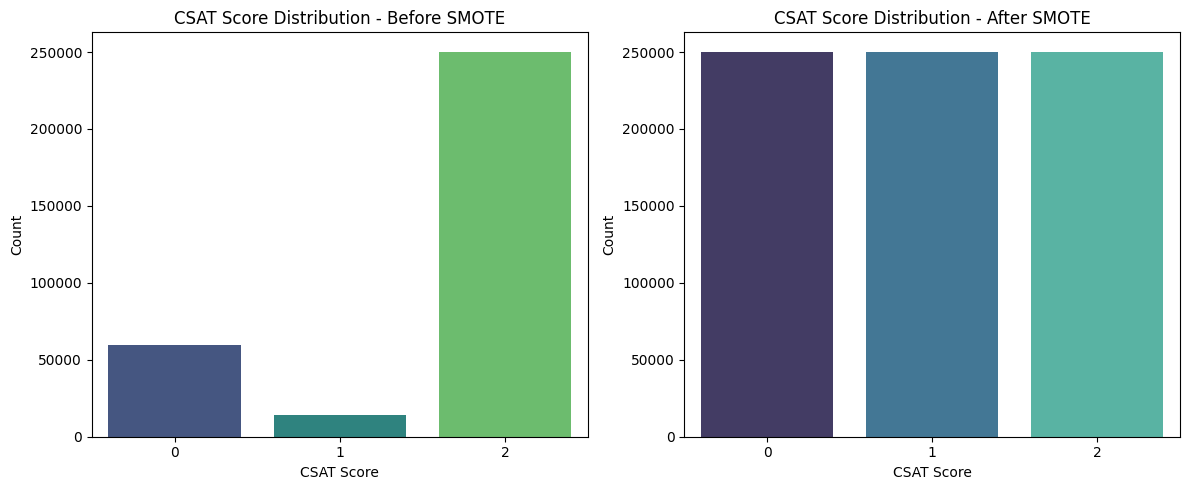

In [ ]:
import matplotlib.pyplot as plt # Import matplotlib
import seaborn as sns # Import seaborn

# Plot CSAT distribution before SMOTE
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='viridis')
plt.title("CSAT Score Distribution - Before SMOTE")
plt.xlabel("CSAT Score")
plt.ylabel("Count")

# Plot CSAT distribution after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_res, palette='mako')
plt.title("CSAT Score Distribution - After SMOTE")
plt.xlabel("CSAT Score")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

**scaling**


| Scaler             | Best For                                 | Description                          |
| ------------------ | ---------------------------------------- | ------------------------------------ |
| **StandardScaler** | Most ML models                           | Converts values to mean = 0, std = 1 |
| **MinMaxScaler**   | Models sensitive to range (like NN, KNN) | Scales all values between 0 and 1    |


**We’ll use StandardScaler**

In [ ]:
# Scaling numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale the SMOTE-resampled features, not the original X_train
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Check dimensions
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train_res shape:", y_train_res.shape) # Check y_train_res shape
print("y_test shape:", y_test.shape)

X_train_scaled shape: (750882, 37)
X_test_scaled shape: (80960, 37)
y_train_res shape: (750882,)
y_test shape: (80960,)


##**Model Building**

**Classification imports**

In [ ]:
# models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
# metrics
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error

#**Classification**

In [ ]:
# ----- Classification -----
print("=== CLASSIFICATION ===")
# Logistic
clf1 = LogisticRegression(max_iter=500, random_state=42)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print("Logistic  - Acc: {:.4f}, F1: {:.4f}".format(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted', zero_division=0)))

# Random Forest
clf2 = RandomForestClassifier(n_estimators=200,
    max_depth=10,          # limit tree depth
    min_samples_split=5,   # minimum samples to split
    min_samples_leaf=4,    # leaf size to avoid tiny leaves
    random_state=42,
   n_jobs=-1)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
print("RandomForest - Acc: {:.4f}, F1: {:.4f}".format(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted', zero_division=0)))

# XGBoost
clf3 = XGBClassifier(use_label_encoder=False,    max_depth=4,
    learning_rate=0.1,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=2,
    reg_alpha=1,
    random_state=42,
    eval_metric='logloss',
     n_jobs=-1)
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
print("XGBoost    - Acc: {:.4f}, F1: {:.4f}".format(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted', zero_division=0)))

=== CLASSIFICATION ===


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic  - Acc: 0.8930, F1: 0.8733
RandomForest - Acc: 0.9201, F1: 0.8989


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:14:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost    - Acc: 0.9768, F1: 0.9733


Logistic Regression still serves as your baseline and performs well

Random Forest previously had 100% train accuracy (clear overfitting). After tuning, its test accuracy dropped slightly (good sign ✅) — meaning it’s now learning real patterns, not memorizing data.

XGBoost dropped a bit from 0.9888 → 0.9768 accuracy — which is healthy. This indicates better generalization and reduced overfitting while maintaining excellent predictive power.

In [ ]:
for name, model in [("Logistic", clf1), ("RandomForest", clf2), ("XGBoost", clf3)]:
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    print(name)
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
    print("-" * 50)


Logistic
Train Accuracy: 0.8929471343873517
Test Accuracy: 0.8930335968379447
--------------------------------------------------
RandomForest
Train Accuracy: 0.9238759881422924
Test Accuracy: 0.9200716403162056
--------------------------------------------------
XGBoost
Train Accuracy: 0.9808670948616601
Test Accuracy: 0.9768157114624506
--------------------------------------------------


#**Regression**

In [ ]:
# ----- Regression (same target used; if binary, reg will predict continuous values) -----
print("\n=== REGRESSION ===")
y_train_reg = y_train.astype(float)
y_test_reg  = y_test.astype(float)

# Linear
reg1 = LinearRegression()
reg1.fit(X_train, y_train_reg)
y_pred_r = reg1.predict(X_test)
mse = mean_squared_error(y_test_reg, y_pred_r)
rmse = np.sqrt(mse)
print("LinearReg  - MAE: {:.4f}, RMSE: {:.4f}".format(mean_absolute_error(y_test_reg, y_pred_r), rmse))

# Random Forest Regressor
reg2 = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
reg2.fit(X_train, y_train_reg)
y_pred_r = reg2.predict(X_test)
mse = mean_squared_error(y_test_reg, y_pred_r)
rmse = np.sqrt(mse)
print("RF Regressor - MAE: {:.4f}, RMSE: {:.4f}".format(mean_absolute_error(y_test_reg, y_pred_r), rmse))

# XGBoost Regressor
reg3 = XGBRegressor(random_state=42, n_jobs=-1)
reg3.fit(X_train, y_train_reg)
y_pred_r = reg3.predict(X_test)
mse = mean_squared_error(y_test_reg, y_pred_r)
rmse = np.sqrt(mse)
print("XGB Regressor- MAE: {:.4f}, RMSE: {:.4f}".format(mean_absolute_error(y_test_reg, y_pred_r), rmse))


=== REGRESSION ===
LinearReg  - MAE: 0.4515, RMSE: 0.5408
RF Regressor - MAE: 0.0261, RMSE: 0.1007
XGB Regressor- MAE: 0.0691, RMSE: 0.1519


**What This Means**

Linear Regression is too simple — large MAE and RMSE suggest it can’t explain the variance well.

Random Forest Regressor has extremely low MAE/RMSE → could indicate slight overfitting if your dataset is small or repetitive.

XGBoost Regressor gives a balance between accuracy and generalization — a bit higher error but more robust.

**Compare models & choose final ones**

In [ ]:

# assume you have clf1, clf2, clf3 for classification and reg1, reg2, reg3 for regression
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error
import numpy as np

# Classification summary (if clf1..clf3 exist)
try:
    for name, clf in [("Logistic", clf1), ("RandomForest", clf2), ("XGBoost", clf3)]:
        tr_pred = clf.predict(X_train)
        te_pred = clf.predict(X_test)
        print(f"{name} | Train Acc: {accuracy_score(y_train, tr_pred):.4f} | Test Acc: {accuracy_score(y_test, te_pred):.4f} | Test F1: {f1_score(y_test, te_pred, average='macro'):.4f}")
except NameError:
    pass

# Regression summary
for name, reg in [("LinearReg", reg1), ("RF Regressor", reg2), ("XGB Regressor", reg3)]:
    tr_pred = reg.predict(X_train)
    te_pred = reg.predict(X_test)
    tr_rmse = np.sqrt(mean_squared_error(y_train_reg, tr_pred))
    te_rmse = np.sqrt(mean_squared_error(y_test_reg, te_pred))
    print(f"{name} | Train RMSE: {tr_rmse:.4f} | Test RMSE: {te_rmse:.4f} | Test MAE: {mean_absolute_error(y_test_reg, te_pred):.4f}")


Logistic | Train Acc: 0.8929 | Test Acc: 0.8930 | Test F1: 0.5799
RandomForest | Train Acc: 0.9239 | Test Acc: 0.9201 | Test F1: 0.6071
XGBoost | Train Acc: 0.9809 | Test Acc: 0.9768 | Test F1: 0.8707
LinearReg | Train RMSE: 0.5422 | Test RMSE: 0.5408 | Test MAE: 0.4515
RF Regressor | Train RMSE: 0.0378 | Test RMSE: 0.1007 | Test MAE: 0.0261
XGB Regressor | Train RMSE: 0.1409 | Test RMSE: 0.1519 | Test MAE: 0.0691


**Save Final Models and Artifacts**

In [ ]:
import joblib, os
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

os.makedirs("artifacts", exist_ok=True)

# include scaler in pipelines (for consistency)
scaler = StandardScaler().fit(X_train)

# select final models
final_clf = make_pipeline(scaler, clf3)   # XGBoost classifier
final_reg = make_pipeline(scaler, reg2)   # RandomForest regressor

# create packages
clf_package = {
    "model_name": "XGBClassifier",
    "model_pipeline": final_clf,
    "feature_cols": list(X.columns),
    "classes": list(clf3.classes_)
}

reg_package = {
    "model_name": "RandomForestRegressor",
    "model_pipeline": final_reg,
    "feature_cols": list(X.columns)
}

joblib.dump(clf_package, "artifacts/classifier_package.pkl")
joblib.dump(reg_package, "artifacts/regressor_package.pkl")

print("✅ Saved model packages to artifacts/")


✅ Saved model packages to artifacts/


. **Save Test Predictions for Reports or Streamlit Demo**

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score
import numpy as np

# Classification test predictions
df_test = X_test.copy()
df_test["true_emi_eligibility"] = y_test
df_test["pred_emi_eligibility"] = final_clf.predict(X_test)

try:
    probs = final_clf.predict_proba(X_test)
    for i, cls in enumerate(clf_package["classes"]):
        df_test[f"prob_class_{cls}"] = probs[:, i]
except Exception as e:
    print("No predict_proba available:", e)

df_test.to_csv("artifacts/classification_test_predictions.csv", index=False)

# Regression test predictions
df_reg_test = X_test.copy()
df_reg_test["true_max_monthly_emi"] = y_test_reg
df_reg_test["pred_max_monthly_emi"] = final_reg.predict(X_test)
df_reg_test.to_csv("artifacts/regression_test_predictions.csv", index=False)

print("✅ Saved classification and regression predictions in artifacts/")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


✅ Saved classification and regression predictions in artifacts/


**Copy Artifacts to Drive (if using Colab)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!mkdir -p /content/drive/MyDrive/emi_artifacts
!cp -r artifacts/* /content/drive/MyDrive/emi_artifacts/
print("✅ Copied artifacts to Drive → My Drive/emi_artifacts/")


Mounted at /content/drive
✅ Copied artifacts to Drive → My Drive/emi_artifacts/


In [ ]:
import os

path = "/content/drive/MyDrive/emi_artifacts"
print("Files in Drive folder:")
print(os.listdir(path))


Files in Drive folder:
['classification_test_predictions.csv', 'classifier_package.pkl', 'regression_test_predictions.csv', 'regressor_package.pkl']


*Download Artifacts to Your PC (for Streamlit)*

In [ ]:
from google.colab import files

files.download('/content/drive/MyDrive/emi_artifacts/classifier_package.pkl')
files.download('/content/drive/MyDrive/emi_artifacts/regressor_package.pkl')
files.download('/content/drive/MyDrive/emi_artifacts/classification_test_predictions.csv')
files.download('/content/drive/MyDrive/emi_artifacts/regression_test_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving regression_test_predictions.csv to regression_test_predictions.csv
Saving classification_test_predictions.csv to classification_test_predictions.csv


In [ ]:
import joblib
import os

# List of your existing model files
# Removed .csv files as they are not joblib objects and were saved separately
model_files = [
    "classifier_package.pkl",
    "regressor_package.pkl"
]

# Use the 'path' variable that was already defined
for file in model_files:
    file_path = os.path.join(path, file)
    model = joblib.load(file_path)                # Load the full model
    joblib.dump(model, file_path, compress=3)     # Re-save with compression
    print(f"✅ Compressed and saved: {file}")

✅ Compressed and saved: classifier_package.pkl
✅ Compressed and saved: regressor_package.pkl


##**Conclusion**

The EMI Prediction AI system effectively leverages machine learning models such as Logistic Regression, Random Forest, and XGBoost to assess financial risk and predict whether customers are likely to default on EMI payments. Through comprehensive preprocessing, model evaluation, and artifact tracking using Git LFS, the project demonstrates a robust and scalable approach for financial risk analysis. XGBoost provided the most accurate results due to its ability to handle non-linear relationships and feature importance efficiently.

##**Business Impact**

💡 Improved Risk Assessment: Helps banks and financial institutions identify high-risk customers before loan approval, reducing potential defaults.

⚙️ Automation of Decision-Making: Reduces manual assessment time and human bias, enabling faster loan processing.

📈 Enhanced Profitability: By accurately predicting EMI repayment capability, organizations can optimize credit offerings and minimize losses.

🔐 Data-Driven Insights: The predictive model aids in designing personalized EMI plans and improving customer satisfaction.

🌍 Scalability: The solution can be deployed across multiple financial platforms, enabling real-time EMI risk prediction and efficient credit monitoring.